In [9]:
import numpy as np
from numpy.linalg import solve, matrix_rank
import matplotlib.pyplot as plt

Method to convert given coefficients to string of the canonical equation relative to x and y

In [10]:
def format_plot_name(cx, cy, c):
    if cx == 0:
        return "{}y = {}".format(cy, c)
    if cy == 0:
        return "{}x = {}".format(cx, c)
    return "{}x {}y = {}".format(cx,
                                 "+ " + str(cy) if cy > 0 else str(cy),
                                 str(c))

Add line on the graph by its coefficients

In [11]:
def add_function(coefs, ax, sol):
    cx, cy, c = coefs[0], coefs[1], coefs[2]
    if sol is not None:
        px, py = sol[0], sol[1]
    else:
        px, py = 0, 0

    if cy == 0:
        x = [c / cx for _ in range(2)]
        y = [py - 100, py + 100]
    elif cx == 0:
        x = [px - 100, py + 100]
        y = [c / cy for _ in range(2)]
    else:
        x = [px - 100, px + 100]
        y = [(c - cx * x1) / cy for x1 in x]
    ax.plot(x, y, label=format_plot_name(cx, cy, c))

Draw the entire graph based on the user input parameters and calculations

In [12]:
def draw_plot(coefs_1, coefs_2, has_one_solution, sol):
    _, ax = plt.subplots(figsize=(10, 10))

    add_function(coefs_1, ax, sol)

    if coefs_1 != coefs_2:
        add_function(coefs_2, ax, sol)

    if has_one_solution:
        plt.scatter(sol[0], sol[1], color="red")

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid(True)
    plt.legend()
    plt.show()

Read user input and provide the calculations result and the graph

Equations have one solution: (x, y) = (102.58333333333333, 461.3333333333333)


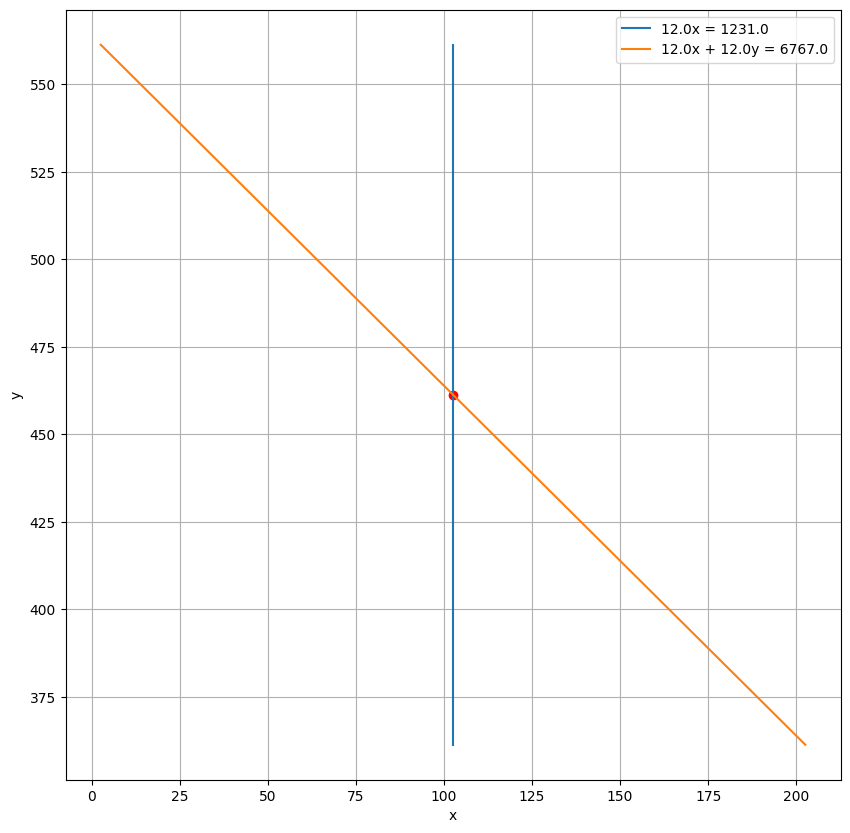

In [13]:
coefs_1 = list(map(float, input().split(" ")))
coefs_2 = list(map(float, input().split(" ")))

m = np.array([coefs_1[:2], coefs_2[:2]])
v = np.array([coefs_1[2], coefs_2[2]])

has_solutions = matrix_rank(m) == matrix_rank(np.array([coefs_1, coefs_2]))
has_infinite_solutions = coefs_1 == coefs_2
sol = None
if has_infinite_solutions:
    print("Equations have infinite amount of solutions")
elif has_solutions:
    sol = solve(m, v)
    print("Equations have one solution: (x, y) = ({}, {})".format(sol[0], sol[1]))
else:
    print("Equations do not have any solutions")
draw_plot(coefs_1, coefs_2, has_solutions and not has_infinite_solutions, sol)